##     Recency | Frequency | Monetary - Adv ML
_________________________________________

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)
#Pandas limits the number of displayed columns, but this setting ensures that all columns are visible, which is useful for large datasets

### Load the dataset:

In [5]:
rfm =pd.read_csv(r"C:\Users\SHIVANG\Documents\Imarticus\Advance ML\Exam\ML Advanced Exam Paper\Dataset\RFM Dataset\RFM data.csv",header=0)
rfm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### Pre-processing the data

In [7]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [8]:
rfm.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,392735.000000,392735,392735,392735.000000,392735,392735.000000,392735.000000,392735,392735.000000
unique,NaN,3629,3837,NaN,16859,NaN,NaN,37,NaN
top,NaN,85123A,white hanging heart t-light holder,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,NaN,2010,2003,NaN,540,NaN,NaN,351196,NaN
mean,560624.318859,NaN,NaN,10.242645,NaN,2.787111,15300.835136,NaN,18.246537
std,13113.076784,NaN,NaN,16.172009,NaN,2.704759,1709.095993,NaN,32.558080
min,536365.000000,NaN,NaN,1.000000,NaN,0.120000,12347.000000,NaN,0.120000
25%,549233.000000,NaN,NaN,2.000000,NaN,1.250000,13975.000000,NaN,4.680000
50%,561894.000000,NaN,NaN,5.000000,NaN,1.950000,15159.000000,NaN,11.700000
75%,572103.000000,NaN,NaN,12.000000,NaN,3.750000,16800.000000,NaN,19.500000


In [9]:
rfm.shape

(392735, 9)

#### Handling Missing Values

In [11]:
rfm.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

#### No missing values found

#### Handling Duplicates

In [14]:
rfm.duplicated().sum()

5182

In [15]:
rfm.drop_duplicates(keep='first', inplace=True)

In [16]:
rfm.duplicated().sum()

0

In [17]:
rfm.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

#### Changing the type of column titled as 'InvoiceDate' to datetime for better calculations and also its gets easy for the model to learn on.

In [19]:
rfm['InvoiceDate']=pd.to_datetime(rfm['InvoiceDate'])

In [20]:
rfm.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

### Checking the RFM for each customer.,  

#### _Recency of Customers_

In [23]:
rfm['InvoiceDate'].min() , rfm['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [24]:
df_recency = rfm.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','LastPurchaseDate']
df_recency['LastPurchaseDate'] = pd.to_datetime(df_recency['LastPurchaseDate'])
recent_date = df_recency['LastPurchaseDate'].max() 
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days) 
df_recency

,CustomerID,LastPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12350.0,2011-02-02 16:01:00,309
4,12352.0,2011-11-03 14:37:00,35
...,...,...,...
4293,18280.0,2011-03-07 09:52:00,277
4294,18281.0,2011-06-12 10:53:00,180
4295,18282.0,2011-12-02 11:43:00,7
4296,18283.0,2011-12-06 12:02:00,3


##### The above dataframe shows us the Recency of each customer

#### _Frequency of Customers_ :

In [27]:
frequency_df=rfm.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
frequency_df.columns=['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12347.0,181
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


##### The above dataframe shows us the Frequency of each customer

In [29]:
frequency_df.max()

CustomerID    18287.0
Frequency      7647.0
dtype: float64

#### _Monetary of Customers_

In [31]:
monetary_df=rfm.groupby(by='CustomerID',as_index=False)['TotalPrice'].sum()
monetary_df.columns=['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12347.0,4060.40
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74


##### The above dataframe shows us the Monetary of each customer

### Merging the Dataframe with all RFM values

In [34]:
rf_df=df_recency.merge(frequency_df,on='CustomerID')
rf_df
rfm_df=rf_df.merge(monetary_df,on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,181,4060.40
1,12348.0,74,27,1437.24
2,12349.0,18,71,1417.60
3,12350.0,309,16,294.40
4,12352.0,35,77,1385.74
...,...,...,...,...
4293,18280.0,277,10,180.60
4294,18281.0,180,7,80.82
4295,18282.0,7,12,178.05
4296,18283.0,3,719,2039.58


#### Calculating the RFM scores

Each customer will get a note between 1 and 5 for each parameter
for Recency(R), Frequency(F) and Monetary value(R)

#### R score:

In [37]:
def recency_score(days):
    if days <= 30:
        return 1
    elif 31>= days <= 60:
        return 2
    elif 61>=days <= 90:
        return 3
    elif 91>=days <= 180:
        return 4
    elif days <= 365:
        return 5

rfm_df['R_Score'] = rfm_df['Recency'].apply(recency_score)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score
0,12347.0,1,181,4060.40,1.0
1,12348.0,74,27,1437.24,4.0
2,12349.0,18,71,1417.60,1.0
3,12350.0,309,16,294.40,5.0
4,12352.0,35,77,1385.74,3.0
...,...,...,...,...,...
4293,18280.0,277,10,180.60,5.0
4294,18281.0,180,7,80.82,5.0
4295,18282.0,7,12,178.05,1.0
4296,18283.0,3,719,2039.58,1.0


#### F score:

In [39]:
def frequency_score(count):
    if count <= 2:
        return 1
    elif count <= 4:
        return 2
    elif count <= 6:
        return 3
    elif count <= 9:
        return 4
    else:
        return 5

rfm_df['F_Score'] = rfm_df['Frequency'].apply(frequency_score)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score
0,12347.0,1,181,4060.40,1.0,5
1,12348.0,74,27,1437.24,4.0,5
2,12349.0,18,71,1417.60,1.0,5
3,12350.0,309,16,294.40,5.0,5
4,12352.0,35,77,1385.74,3.0,5
...,...,...,...,...,...,...
4293,18280.0,277,10,180.60,5.0,5
4294,18281.0,180,7,80.82,5.0,4
4295,18282.0,7,12,178.05,1.0,5
4296,18283.0,3,719,2039.58,1.0,5


#### M score:

In [41]:
def monetary_score(amount):
    if amount <= 50:
        return 1
    elif amount <= 100:
        return 2
    elif amount <= 200:
        return 3
    elif amount <= 300:
        return 4
    else:
        return 5

rfm_df['M_Score'] = rfm_df['Monetary'].apply(monetary_score)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12347.0,1,181,4060.40,1.0,5,5
1,12348.0,74,27,1437.24,4.0,5,5
2,12349.0,18,71,1417.60,1.0,5,5
3,12350.0,309,16,294.40,5.0,5,4
4,12352.0,35,77,1385.74,3.0,5,5
...,...,...,...,...,...,...,...
4293,18280.0,277,10,180.60,5.0,5,3
4294,18281.0,180,7,80.82,5.0,4,2
4295,18282.0,7,12,178.05,1.0,5,3
4296,18283.0,3,719,2039.58,1.0,5,5


In [42]:
rfm_df['Total_RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Total_RFM_Score
0,12347.0,1,181,4060.40,1.0,5,5,11.0
1,12348.0,74,27,1437.24,4.0,5,5,14.0
2,12349.0,18,71,1417.60,1.0,5,5,11.0
3,12350.0,309,16,294.40,5.0,5,4,14.0
4,12352.0,35,77,1385.74,3.0,5,5,13.0
...,...,...,...,...,...,...,...,...
4293,18280.0,277,10,180.60,5.0,5,3,13.0
4294,18281.0,180,7,80.82,5.0,4,2,11.0
4295,18282.0,7,12,178.05,1.0,5,3,9.0
4296,18283.0,3,719,2039.58,1.0,5,5,11.0


In [43]:
rfm_new = rfm_df[['CustomerID','R_Score', 'F_Score', 'M_Score','Total_RFM_Score']]
rfm_new

,CustomerID,R_Score,F_Score,M_Score,Total_RFM_Score
0,12347.0,1.0,5,5,11.0
1,12348.0,4.0,5,5,14.0
2,12349.0,1.0,5,5,11.0
3,12350.0,5.0,5,4,14.0
4,12352.0,3.0,5,5,13.0
...,...,...,...,...,...
4293,18280.0,5.0,5,3,13.0
4294,18281.0,5.0,4,2,11.0
4295,18282.0,1.0,5,3,9.0
4296,18283.0,1.0,5,5,11.0


### Segmenting the customers based on their RFM scores using the dataset.

- Champions: RFM score range - R: 4-5, F: 4-5, M: 4-5
- Loyal customers: RFM score range - R: 3-5, F: 3-5, M: 3-5
- Potential loyalist: RFM score range - R: 4-5, F: 2-3, M: 2-3
- Recent customers: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Promising: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Needs attention: RFM score range - R: 3-5, F: 3-5, M: 3-5
- About to sleep: RFM score range - R: 1-2, F: 1-2, M: 1-2
- At risk: RFM score range - R: 2-5, F: 1-3, M: 1-3
- Can't lose them: RFM score range - R: 1-3, F: 4-5, M: 4-5
- Hibernating: RFM score range - R: 1-2, F: 1-2, M: 1-2

In [45]:
def customer_segmentation(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal customers'
    elif row['R_Score'] >= 4 and row['F_Score'] in [2, 3] and row['M_Score'] in [2, 3]:
        return 'Potential loyalist'
    elif row['R_Score'] >= 4 and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Recent customers'
    elif row['R_Score'] >= 4 and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Promising'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Needs attention'
    elif row['R_Score'] in [1, 2] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'About to sleep'
    elif row['R_Score'] in [2, 3, 4, 5] and row['F_Score'] in [1, 2, 3] and row['M_Score'] in [1, 2, 3]:
        return 'At risk'
    elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [4, 5] and row['M_Score'] in [4, 5]:
        return 'Can\'t lose them'
    elif row['R_Score'] in [1, 2] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Hibernating'

rfm_new['Segment'] = rfm_new.apply(customer_segmentation, axis=1)
rfm_new[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'Total_RFM_Score', 'Segment']]

,CustomerID,R_Score,F_Score,M_Score,Total_RFM_Score,Segment
0,12347.0,1.0,5,5,11.0,Can't lose them
1,12348.0,4.0,5,5,14.0,Champions
2,12349.0,1.0,5,5,11.0,Can't lose them
3,12350.0,5.0,5,4,14.0,Champions
4,12352.0,3.0,5,5,13.0,Loyal customers
...,...,...,...,...,...,...
4293,18280.0,5.0,5,3,13.0,Loyal customers
4294,18281.0,5.0,4,2,11.0,None
4295,18282.0,1.0,5,3,9.0,None
4296,18283.0,1.0,5,5,11.0,Can't lose them


### Counting number of customers under each category:

In [46]:
rfm_new['Segment'].value_counts()

Segment
Can't lose them       1561
Champions             1318
Loyal customers        992
Potential loyalist      62
Recent customers        56
At risk                 32
About to sleep          18
Name: count, dtype: int64

### Visualizing the RFM segments

In [48]:
import plotly.express as px

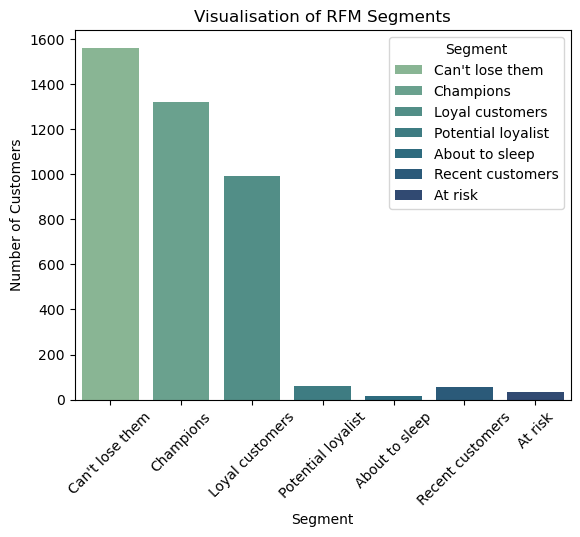

In [49]:
sns.countplot(data=rfm_new, x= 'Segment',hue='Segment', palette='crest')
plt.title('Visualisation of RFM Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45);

### Concluding my findings of RFM analysis and suggesting some strategies on it.

### _Findings of RFM_

**_Lower Engagement Segments_**  

**"At risk" (32 customers):**
These are customers who were active in the past but have shown a significant decline in their engagement and purchasing behavior.

**"About to sleep" (18 customers):**
Customers in this segment are on the verge of becoming inactive or dormant, requiring prompt re-engagement strategies.

--------------------------------------------------------------------------------------
_**Mid-Level Segments:**_    

**"Potential loyalist" (62 customers):**
These are recently engaged customers who show signs of becoming loyal but have yet to establish a regular pattern of interaction or purchases.

**"Recent customers" (56 customers):**
These are new customers who have recently made their first purchase but lack a defined engagement trend

--------------------------------------------------------------------------------------

_**Top Segments:**_

**"Champions" (1318 customers):**
These are your best customers who consistently engage and make frequent purchases. They are highly loyal and significantly contribute to overall revenue.

**"Can't lose them" (1561 customers):**
The largest segment, comprising high-value customers who were once very active but have recently reduced their engagement. They are at risk of churning and need immediate attention.

**"Loyal customers" (992 customers):**
These customers demonstrate consistent engagement and purchases, showcasing loyalty but with slightly less frequency or recency compared to the Champions.

### _Business Strategies for Each Segment_

##### _At Risk:_ Reactivate with urgency-driven campaigns and addressing concerns.
##### _About to Sleep:_ Prevent inactivity with last-chance offers and win-back emails.
##### _Potential Loyalists:_ Build loyalty via welcome offers, education, and reminders.
##### _Recent Customers:_ Onboard with discounts, support, and brand introductions.
##### _Champions:_ Reward loyalty with VIP perks, referrals, and milestone celebrations.
##### _Can't Lose Them:_ Re-engage through personalized offers, loyalty rewards, and feedback.
##### _Loyal Customers:_ Strengthen bonds with upselling, surprise rewards, and feedback.

---------------------------------------

Done by : Shivang Talati :)